<a href="https://colab.research.google.com/github/PunAditep/Aditep_project_Data/blob/main/K_Nearest_Neighbors_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
from scipy import stats
%matplotlib inline
import seaborn as sns

# import Data


https://drive.google.com/file/d/15htM1xZz5sANYtkon-HppBR7muhWWlFA/view?usp=share_link

In [ ]:
!gdown https://drive.google.com/uc?id=15htM1xZz5sANYtkon-HppBR7muhWWlFA

Downloading...
From: https://drive.google.com/uc?id=15htM1xZz5sANYtkon-HppBR7muhWWlFA
To: /content/bank.csv
100% 919k/919k [00:00<00:00, 92.3MB/s]


In [ ]:
df = pd.read_csv("bank.csv",low_memory=False)

#Data processing


In [ ]:
# skip row 1 so pandas can parse the data properly.

half_count = len(df) / 2
df = df.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values

df.drop_duplicates(inplace=True) 
df.shape

(11162, 17)

-   the **.applymap()** method to **apply the same function to each element of the dataframe** that is a string. Here's an example
-   **isinstance(x, str)** is a built-in Python function that returns True if the value x is a string, and False otherwise

columns=lambda x: x.strip() is a lambda function used in pandas to rename columns of a DataFrame.

Here, the lambda keyword is used to define an anonymous function that takes a single argument x, which represents a column name. The function then applies the strip() method to the column name x to remove any leading or trailing spaces.

This lambda function is passed to the .rename() method as the columns parameter, which specifies a mapping of old column names to new column names. By using this function, we can apply the strip() method to each column name in the DataFrame to remove any leading or trailing spaces in the column names.

So, in summary, columns=lambda x: x.strip() means that we are applying a lambda function to each column name in the DataFrame, which strips any leading or trailing spaces from the column name

In [ ]:
df = df.rename(columns=lambda x: x.strip())
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
df.info()
#the data not have null value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

##understanding Data and Drop Column
- 1) Remove id's (model) as many unique values  2) irrelevant variables  
3) Remove zip code & date 4) Temporal infidelity(data from future) 
5) Calculated variables

In [ ]:
df_dtypes = pd.DataFrame(df.dtypes,columns=['dtypes'])
df_dtypes = df_dtypes.reset_index()
df_dtypes = df_dtypes.rename(columns={'index': 'name'})
df_dtypes['first value'] = df.iloc[0].values 
meaning = ["Customer's age","Customer's job","Customer's marital status","Customer education level","Does the customer already have a loan?","Customer's individual balance",
           "Does the client have a home loan?","Does the customer have a personal loan","Customer's contact type","Last contact day of the week","Last contact month of the year","Last contact time, in seconds",
           "Number of contacts performed during this campaign and for this customer","Number of days since the customer was last contacted from a previous campaign","Number of contacts performed before this campaign and for this customer",
          "Result of previous marketing campaign","Has the customer subscribed to a time deposit?"]
df_dtypes.insert(1,'meaning',meaning)
df_dtypes

,name,meaning,dtypes,first value
0,age,Customer's age,int64,59
1,job,Customer's job,object,admin.
2,marital,Customer's marital status,object,married
3,education,Customer education level,object,secondary
4,default,Does the customer already have a loan?,object,no
5,balance,Customer's individual balance,int64,2343
6,housing,Does the client have a home loan?,object,yes
7,loan,Does the customer have a personal loan,object,no
8,contact,Customer's contact type,object,unknown
9,day,Last contact day of the week,int64,5


-   remove flat column

In [ ]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1] #remove if the number of unique value in column equal to 1
for col in df.columns:
    if (len(df[col].unique()) < 4):
        print(df[col].value_counts())
        print()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

no     10994
yes      168
Name: default, dtype: int64

no     5881
yes    5281
Name: housing, dtype: int64

no     9702
yes    1460
Name: loan, dtype: int64

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

no     5873
yes    5289
Name: deposit, dtype: int64



It does not have a flat table, but it does have **the incorrect relevant columns**, which are in default, housing, and loan columns.

In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26782 sha256=4c8e3d3ec4e87530a4c987976aab3ae8c67b1662818d62bf0fe7e02511055037
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [ ]:
df.rename(columns={'default': 'default_status'}, inplace=True)

In [ ]:
import pandasql 
sql_df = pandasql.sqldf("SELECT CASE \
                                  WHEN housing = 'yes' or loan = 'yes' THEN 'yes'\
                                  ELSE 'no'\
                                END AS 'status_loan',\
                      housing,\
                      loan  FROM df;")
sql_df

,status_loan,housing,loan
0,yes,yes,no
1,no,no,no
2,yes,yes,no
3,yes,yes,no
4,no,no,no
...,...,...,...
11157,yes,yes,no
11158,no,no,no
11159,no,no,no
11160,yes,no,yes


In [ ]:
df = df.drop(columns = ['default_status','housing','loan'],axis=1)
df = pd.concat([df.iloc[:,:5],sql_df,df.iloc[:,5:]],axis=1)
df.head()

,age,job,marital,education,balance,status_loan,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,2476,yes,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
#adjust nominal Target > 
mapping_dictionary = {"deposit":{ "yes": 1, "no": 0}}
df = df.replace(mapping_dictionary)

##investigate string column

In [ ]:
df.dtypes.value_counts()

object    9
int64     8
dtype: int64

In [ ]:
object_columns_df = df.select_dtypes(include=['object']) #print(object_columns_df.iloc[0]) for looking value
object_columns_df


,job,marital,education,status_loan,housing,loan,contact,month,poutcome
0,admin.,married,secondary,yes,yes,no,unknown,may,unknown
1,admin.,married,secondary,no,no,no,unknown,may,unknown
2,technician,married,secondary,yes,yes,no,unknown,may,unknown
3,services,married,secondary,yes,yes,no,unknown,may,unknown
4,admin.,married,tertiary,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,yes,yes,no,cellular,apr,unknown
11158,services,married,secondary,no,no,no,unknown,jun,unknown
11159,technician,single,secondary,no,no,no,cellular,aug,unknown
11160,technician,married,secondary,yes,no,yes,cellular,may,failure


In [ ]:
object_columns_df = df.select_dtypes(include=['object']) #print(object_columns_df.iloc[0]) for looking value

cols = ['job', 'marital','education','status_loan','housing','loan','contact','month','poutcome']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')


job :
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64 

marital :
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64 

education :
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64 

status_loan :
yes    5906
no     5256
Name: status_loan, dtype: int64 

housing :
no     5881
yes    5281
Name: housing, dtype: int64 

loan :
no     9702
yes    1460
Name: loan, dtype: int64 

contact :
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64 

month :
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64 

poutcome :
unknown    8326
fa

- eliminate the rows have unknown value as same as null

In [ ]:
#eliminate column have null > 50%
df = df.drop('poutcome',axis=1)
df.head()

,age,job,marital,education,balance,status_loan,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,yes,no,unknown,5,may,1042,1,-1,0,1
1,56,admin.,married,secondary,45,no,no,no,unknown,5,may,1467,1,-1,0,1
2,41,technician,married,secondary,1270,yes,yes,no,unknown,5,may,1389,1,-1,0,1
3,55,services,married,secondary,2476,yes,yes,no,unknown,5,may,579,1,-1,0,1
4,54,admin.,married,tertiary,184,no,no,no,unknown,5,may,673,2,-1,0,1


In [ ]:
#Tip .eq
df.drop(df[df.eq("unknown").any(axis=1)].index, inplace=True)
object_columns_df = df.select_dtypes(include=['object'])
for name in object_columns_df.columns:
  print(name,':')
  print(object_columns_df[name].value_counts(),'\n')

job :
management       2124
technician       1436
blue-collar      1199
admin.           1024
retired           646
services          642
self-employed     309
unemployed        292
student           280
entrepreneur      234
housemaid         207
Name: job, dtype: int64 

marital :
married     4702
single      2748
divorced     943
Name: marital, dtype: int64 

education :
secondary    4178
tertiary     3174
primary      1041
Name: education, dtype: int64 

status_loan :
no     4386
yes    4007
Name: status_loan, dtype: int64 

housing :
no     4919
yes    3474
Name: housing, dtype: int64 

loan :
no     7278
yes    1115
Name: loan, dtype: int64 

contact :
cellular     7692
telephone     701
Name: contact, dtype: int64 

month :
aug    1444
jul    1390
may    1354
nov     893
apr     869
feb     735
jun     394
oct     342
jan     319
sep     287
mar     264
dec     102
Name: month, dtype: int64 



In [ ]:
df.shape

(8393, 16)

## The numeric value

In [ ]:
numeric_columns_df = df.select_dtypes(include=['float64','int64'])
numeric_columns_df.drop(columns= 'deposit',inplace = True)
numeric_columns_df.head()

,age,balance,day,duration,campaign,pdays,previous
367,28,-127,4,1044,3,-1,0
368,55,49,7,494,4,-1,0
369,51,216,7,615,2,-1,0
370,39,506,7,718,2,-1,0
371,42,213,7,434,3,-1,0


In [ ]:
numeric_columns_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8393.000000,8393.000000,8393.000000,8393.000000,8393.000000,8393.000000,8393.000000
mean,41.261766,1600.125819,15.611224,375.467175,2.436673,64.288216,1.051471
std,12.282230,3381.324330,8.403283,338.627469,2.459457,116.813541,2.523714
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,133.000000,8.000000,146.000000,1.000000,-1.000000,0.000000
50%,38.000000,580.000000,15.000000,263.000000,2.000000,-1.000000,0.000000
75%,49.000000,1796.000000,22.000000,501.000000,3.000000,95.000000,1.000000
max,95.000000,81204.000000,31.000000,3284.000000,43.000000,854.000000,58.000000


In [ ]:
#consider null value in formula -1 in the pdays column
#pdays_df = numeric_columns_df[numeric_columns_df['pdays'] == -1]
#print('The number of -1: ', pdays_df.shape[0])
#print('The number of total rows: ', numeric_columns_df.shape[0])
#print('Null percentage : ', (pdays_df.shape[0] / numeric_columns_df.shape[0]) * 100, '%')

In [ ]:
numeric_columns_df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.115004,0.012657,0.009181,-0.013919,-0.005093,0.010498
balance,0.115004,1.000000,0.001971,0.018256,-0.022977,0.010691,0.026242
day,0.012657,0.001971,1.000000,-0.021564,0.176623,-0.087174,-0.067881
duration,0.009181,0.018256,-0.021564,1.000000,-0.033177,-0.030449,-0.030980
campaign,-0.013919,-0.022977,0.176623,-0.033177,1.000000,-0.113070,-0.049428
pdays,-0.005093,0.010691,-0.087174,-0.030449,-0.113070,1.000000,0.486615
previous,0.010498,0.026242,-0.067881,-0.030980,-0.049428,0.486615,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

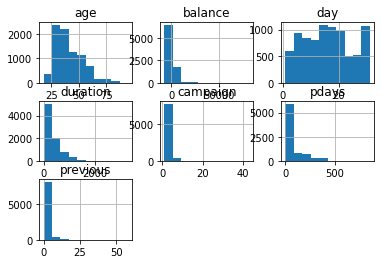

In [ ]:
numeric_columns_df.hist()

In [ ]:
e = list(numeric_columns_df.columns)
d = {}
for name in e:
   kurtosis_before_value = kurtosis(numeric_columns_df[name])
   skew_before_value = skew(numeric_columns_df[name])
   d[name] = [kurtosis_before_value,skew_before_value]
check_df = pd.DataFrame.from_dict(d, orient='index', columns=['kurtosis', 'skewness'])
check_df = check_df.reset_index()
check_df.columns = ['name', 'kurtosis', 'skewness']
check_df

,name,kurtosis,skewness
0,age,0.536550,0.898358
1,balance,125.531764,8.254809
2,day,-1.028923,0.119728
3,duration,6.468118,2.057078
4,campaign,36.095962,4.625502
5,pdays,4.455301,2.024420
6,previous,85.592125,6.509654


summary : normal distribution column = age  

In [ ]:
df.shape

(8393, 16)

In [ ]:
#eliminate outlier +-3sd
df['z'] = np.abs(stats.zscore(df['age']))
df = df[np.logical_and(-3<df["z"],df["z"]<3)]
df = df.drop('z',axis = True)
df.shape

(8320, 16)

In [ ]:
df = df.reset_index(drop=True)
df_v = df.copy(deep = True)
df_v.head()

,age,job,marital,education,balance,status_loan,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,28,blue-collar,single,secondary,-127,yes,yes,no,cellular,4,jul,1044,3,-1,0,1
1,55,blue-collar,married,secondary,49,yes,yes,no,cellular,7,jul,494,4,-1,0,1
2,51,technician,married,secondary,216,no,no,no,cellular,7,jul,615,2,-1,0,1
3,39,technician,single,secondary,506,yes,yes,no,cellular,7,jul,718,2,-1,0,1
4,42,blue-collar,divorced,primary,213,yes,yes,no,cellular,7,jul,434,3,-1,0,1


- case is not normal distribution column : if eliminate outlier,it will data around 30%

However, the approach to dealing with outliers in logistic regression may differ from that in linear regression. In linear regression, outliers can have a significant impact on the estimated coefficients, and removing them can lead to better results. However, in logistic regression, the impact of outliers on the estimated coefficients is generally smaller and more complex.

Therefore, while it is important to be aware of the presence of outliers in logistic regression, the decision of whether or not to manipulate them depends on the specific context of the problem being solved and the type of outliers present. In some cases, it may be appropriate to remove or downweight extreme outliers to improve the model performance, while in other cases, it may be more appropriate to include them in the analysis and investigate their potential impact on the results.

In general, it is important to explore the data and use domain knowledge to determine the appropriate approach to dealing with outliers in logistic regression. It is also important to report the approach taken and any assumptions or limitations of the analysis in order to ensure the results are transparent and reproducible.

In [ ]:
#e = ['balance',	'day','duration','campaign','previous']
#for name in e :
#  q75, q25 = np.percentile(df[name], [75 ,25]) 
#  iqr = q75 - q25
#  min = q25 - (iqr*1.5)
#  max = q75 + (iqr*1.5)
#  df['Outlier'] = 0
#  df.loc[df[name] < min, 'Outlier'] = 1
#  df.loc[df[name] > max, 'Outlier'] = 1
#  df  = df[df['Outlier'] == 0]
#  df.drop(columns = ['Outlier'],axis=1,inplace = True)
#df.shape

## The ordinal Values

In [ ]:
df['month'] = df['month'].replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
df['education'] = df['education'].replace({'primary':1,'secondary':2,'tertiary':3})

## The Nominal Values,converted into dummy variables

In [ ]:
nominal_columns = ["job", "marital", "status_loan","housing","loan","contact"] 

dummy_df = pd.get_dummies(df[nominal_columns], drop_first=True) #get dummy/ true = drop first dummy / flase not drop anything
df = pd.concat([df, dummy_df], axis=1) #join original table and dummy table
df = df.drop(nominal_columns, axis=1) #drop old value

df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,deposit,...,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,status_loan_yes,housing_yes,loan_yes,contact_telephone
0,28,2,-127,4,7,1044,3,-1,0,1,...,0,0,0,0,0,1,1,1,0,0
1,55,2,49,7,7,494,4,-1,0,1,...,0,0,0,0,1,0,1,1,0,0
2,51,2,216,7,7,615,2,-1,0,1,...,0,0,1,0,1,0,0,0,0,0
3,39,2,506,7,7,718,2,-1,0,1,...,0,0,1,0,0,1,1,1,0,0
4,42,1,213,7,7,434,3,-1,0,1,...,0,0,0,0,0,0,1,1,0,0


#2) supervised model

##  train test spilit

In [ ]:
from sklearn.model_selection import train_test_split
X =  df.drop('deposit',axis=1)
y = df['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=191)

## Generate K-Nearest Neighbors model

In [ ]:
import time
start = time.time()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

kn =  KNeighborsClassifier()
param_grid = [
{'n_neighbors': list(range(1, 101, 2)), 'weights': ['uniform', 'distance']}
]

kn_grid_search = GridSearchCV(kn, param_grid, cv=5, scoring='f1_macro', n_jobs = -1) #n_jobs = -1 to up potentially speed up the training process for large datasets
kn_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39,
                                          41, 43, 45, 47, 49, 51, 53, 55, 57,
                                          59, ...],
                          'weights': ['uniform', 'distance']}],
             scoring='f1_macro')

In [ ]:
kn_grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=21, weights='distance')

In [ ]:
clf_kn = kn_grid_search.best_estimator_.fit(X_train, y_train)
y_pred = clf_kn.predict(X_test)


## Evaluate model

In [ ]:
# Confusion Metrix LogisticRegression
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[678 289]
 [255 858]]


In [ ]:
# Classification Report LogisticRegression
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test,y_pred,digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.7267    0.7011    0.7137       967
           1     0.7480    0.7709    0.7593      1113

    accuracy                         0.7385      2080
   macro avg     0.7374    0.7360    0.7365      2080
weighted avg     0.7381    0.7385    0.7381      2080



In [ ]:
stop = time.time()
print("Time :",stop-start,"Second")

Time : 104.34215760231018 Second
